<a href="https://colab.research.google.com/github/taesangeom/SK-T-Academy/blob/main/DL/Yolo/yolo_re_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 실습은 T4 정도에서 하시는 것을 추천!!!!

In [ ]:
# YOLO : 패키지 & 사이트에 공개된 영상쪽 모델을 중심으로!!!
#      : Facebook ---> SAM : Segment관련 모델!!!!
# ===> 영상쪽 관련에서 종종 yolo 모델을 사용하는 경우가 있음!!! : Fast!!!
#      적당히 가성비(시간/ cost)가 좋아서 주로 사용을 많이 함!!!
#      여러 사이즈별로 학습을 한 모델을 배포!!!!--> 큰모델, 작은 모델~~~
# ===> 영상쪽의 이슈 : 실시간 처리!!!!
#      120fps, 240fps etc --->
#      영상쪽 실시간 모니터링을 하기 위해서는 큰 서버들이 많이 필요함!!!
# 이미지 관련 여러 Task!!!
# ---> 이미지에 대한 분류 : 개/ 고양이 ---> 개 중에서 무슨 종이냐!!!
#                    검출 : 개가 있는지 체크1!!! ---> 있다고 하면,,어디에 있는지!!!
#                           대상의 pixel이 어디에 있는지 찾아 : Segment 관련!!

In [ ]:
# yolo초기 논문상 기호!!!
# S : 입력 이미지에 대한 격자 정보 --> 이미지를 S 크기로 나눈 크기
# B : 1개 격자 속에 있는 박스의 수
# ===> 1개 Box 에는 5개의 정보 : P(확률), x,y,w,h --> 기준좌표 + w/h :박스 그릴 정보
#      (단, 데이터, 사용하는 모델마다 이 기준을 다를 수 있음!!)
#      [ 서로 다른 기준을 사용한다면,,,기준을 서로 왔다 갔다 할 수 있는 변환!!!]
# C : 찾고자 하는 class에 대한 정보
# ==> ver1 논문상 :  S = 7, B = 2, C = 20
#                 최종 출력 : S * S * (B*5 + C)
#                             =  7*7      (2 * 5 + 20 )
#                             = 7 * 7 * 30

In [ ]:
B

In [ ]:
# yolo로 학습을 하기 위해서 필요한 파일들이 존재!!!!
# 1. 모델별로 사전 학습된 모델 파일!!!! --> weight
# 2. 모델을 돌리는 환경 설정 관련!!!!
# 3. 기존 학습된 라벨에 대한 정보!!!!!!!
#    ===> ver1 : IamgeNet
#         ver3 : COCOnet

In [ ]:
# --> 사용하는 버전에 맞는 모델 정보들을 다운로드!
!gdown 11NDUoHzKWRWEtaJNPX7srk6SQslQQ32Z
!gdown 1TY0iP3jLMB0jXHeQQ2Lgh5ZI1SGpabkI
!gdown 18Y8siRgCy2ZeChM_V4E-DLi0VKxHkg8G

Downloading...
From (original): https://drive.google.com/uc?id=11NDUoHzKWRWEtaJNPX7srk6SQslQQ32Z
From (redirected): https://drive.google.com/uc?id=11NDUoHzKWRWEtaJNPX7srk6SQslQQ32Z&confirm=t&uuid=f1998e52-71cd-4043-bcb5-4f396310a160
To: /content/yolov3.weights
100% 248M/248M [00:07<00:00, 32.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1TY0iP3jLMB0jXHeQQ2Lgh5ZI1SGpabkI
To: /content/yolov3.cfg
100% 8.34k/8.34k [00:00<00:00, 33.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=18Y8siRgCy2ZeChM_V4E-DLi0VKxHkg8G
To: /content/coco.names
100% 625/625 [00:00<00:00, 3.65MB/s]


In [ ]:
import cv2

In [ ]:
# coconet의 .name 파일 열기 위해서..
names = open( '/content/coco.names').read()
names

'person\nbicycle\ncar\nmotorbike\naeroplane\nbus\ntrain\ntruck\nboat\ntraffic light\nfire hydrant\nstop sign\nparking meter\nbench\nbird\ncat\ndog\nhorse\nsheep\ncow\nelephant\nbear\nzebra\ngiraffe\nbackpack\numbrella\nhandbag\ntie\nsuitcase\nfrisbee\nskis\nsnowboard\nsports ball\nkite\nbaseball bat\nbaseball glove\nskateboard\nsurfboard\ntennis racket\nbottle\nwine glass\ncup\nfork\nknife\nspoon\nbowl\nbanana\napple\nsandwich\norange\nbroccoli\ncarrot\nhot dog\npizza\ndonut\ncake\nchair\nsofa\npottedplant\nbed\ndiningtable\ntoilet\ntvmonitor\nlaptop\nmouse\nremote\nkeyboard\ncell phone\nmicrowave\noven\ntoaster\nsink\nrefrigerator\nbook\nclock\nvase\nscissors\nteddy bear\nhair drier\ntoothbrush\n'

In [ ]:
print(names)

person
bicycle
car
motorbike
aeroplane
bus
train
truck
boat
traffic light
fire hydrant
stop sign
parking meter
bench
bird
cat
dog
horse
sheep
cow
elephant
bear
zebra
giraffe
backpack
umbrella
handbag
tie
suitcase
frisbee
skis
snowboard
sports ball
kite
baseball bat
baseball glove
skateboard
surfboard
tennis racket
bottle
wine glass
cup
fork
knife
spoon
bowl
banana
apple
sandwich
orange
broccoli
carrot
hot dog
pizza
donut
cake
chair
sofa
pottedplant
bed
diningtable
toilet
tvmonitor
laptop
mouse
remote
keyboard
cell phone
microwave
oven
toaster
sink
refrigerator
book
clock
vase
scissors
teddy bear
hair drier
toothbrush



In [ ]:
# ==> 일반적인 사물에 대한 인식은 가능함!!!
#     특수한 목적에 맞는 사물에 대한 인식을 재학습!!!!!!!
# ==> 어떻게 데이터를 수집을 해서, 나의 용도에 맞게
#     다시 학습을 할 것인가!!!!!!!!!!

In [ ]:
# ver v3 : weight/ cfg
weight_path = '/content/yolov3.weights'
conf_path = '/content/yolov3.cfg'

In [ ]:
# 여기서는 yolo모델을 openCV를 통해서 전처리 사용을 하겠습니다!!!
# ===> 본인 편하신 툴/패키지를 중심으로 사용하시면 됨!!!!

# **** opencv를 활용해서 yolo를 핸들링을 하려고 함!!!!!!

In [ ]:
yolo_model = cv2.dnn.readNetFromDarknet(conf_path,
                                        weight_path)

In [ ]:
# keras --> model.layers
layers = yolo_model.getLayerNames()
print(layers)

('conv_0', 'bn_0', 'leaky_1', 'conv_1', 'bn_1', 'leaky_2', 'conv_2', 'bn_2', 'leaky_3', 'conv_3', 'bn_3', 'leaky_4', 'shortcut_4', 'conv_5', 'bn_5', 'leaky_6', 'conv_6', 'bn_6', 'leaky_7', 'conv_7', 'bn_7', 'leaky_8', 'shortcut_8', 'conv_9', 'bn_9', 'leaky_10', 'conv_10', 'bn_10', 'leaky_11', 'shortcut_11', 'conv_12', 'bn_12', 'leaky_13', 'conv_13', 'bn_13', 'leaky_14', 'conv_14', 'bn_14', 'leaky_15', 'shortcut_15', 'conv_16', 'bn_16', 'leaky_17', 'conv_17', 'bn_17', 'leaky_18', 'shortcut_18', 'conv_19', 'bn_19', 'leaky_20', 'conv_20', 'bn_20', 'leaky_21', 'shortcut_21', 'conv_22', 'bn_22', 'leaky_23', 'conv_23', 'bn_23', 'leaky_24', 'shortcut_24', 'conv_25', 'bn_25', 'leaky_26', 'conv_26', 'bn_26', 'leaky_27', 'shortcut_27', 'conv_28', 'bn_28', 'leaky_29', 'conv_29', 'bn_29', 'leaky_30', 'shortcut_30', 'conv_31', 'bn_31', 'leaky_32', 'conv_32', 'bn_32', 'leaky_33', 'shortcut_33', 'conv_34', 'bn_34', 'leaky_35', 'conv_35', 'bn_35', 'leaky_36', 'shortcut_36', 'conv_37', 'bn_37', 'leaky_

* 참고 아래 그림에서 중간 output에서 모양이 26 by 26인데 오타가 나옴..
<img src="https://www.atlantis-press.com/assets/articles/IJCIS-13-1-1153/IJCIS-13-1-1153-g001.png">
<img src="https://viso.ai/wp-content/uploads/2021/02/YOLOv3-prediction-results-1060x876.jpg">

In [ ]:
# openCV에서 사용할 때 주의할 점 : 출력층을 빼서 사용을 해얗 함!!!!
# ==> ver3의 경우에서는 중간에 3가자의 해상도를 기반으로 출력 3장!!!!

for i in yolo_model.getUnconnectedOutLayers():
    print(layers[i-1])

yolo_82
yolo_94
yolo_106


In [ ]:
# ==> yolo v3에 대해서 3개 출력!!!
output_layers = [layers[i-1]  for i in yolo_model.getUnconnectedOutLayers()]
output_layers

['yolo_82', 'yolo_94', 'yolo_106']

In [ ]:
# case1) 80개 종류로 검출을 해보도록 하겠습니다
# ------> coconet으로 학습된 사물에 대해서!!!!
# ver1의 멍멍이 사진으로 체크를 해보겠습니다.

In [ ]:
!gdown 1oBqeCba21ihm80OP_iDOEX77BKweGP7j

Downloading...
From: https://drive.google.com/uc?id=1oBqeCba21ihm80OP_iDOEX77BKweGP7j
To: /content/dog.png
100% 692k/692k [00:00<00:00, 8.80MB/s]


In [ ]:
import matplotlib.pyplot as plt

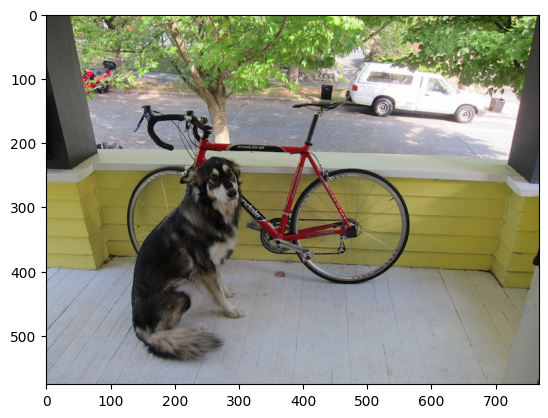

In [ ]:
image = cv2.imread("/content/dog.png")
# ---> 참고 : 코랩에서 opencv를 사용할 때,,
#             스머프 현상---> 채널을 정리하는 과정이!!!!
plt.imshow( cv2.cvtColor( image, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
image.shape

(576, 768, 3)

In [ ]:
# 원래는 여러 이미지들을 중심으로 처리!!!!
# or 폴더 구조!!!!!
# -==:> 오타;;;FromImages ---> FromImage로 단수로;;;;
blob = cv2.dnn.blobFromImage( image,
                              1/255.,
                               (400,400),
                               swapRB=True,
                               crop=False)
# --> opencv에서도 많은 전처리 기능이 있음!!!!

In [ ]:
print(image.shape)
print(blob.shape)
# ---> pytorch/ opencv : 계열은 채널은 앞으로 돌리는 경향
#      keras/tf        : 채널을 뒤로 돌리는 경향..

(576, 768, 3)
(1, 3, 400, 400)


In [ ]:
# 모델에 적용을 해보도록 하겠습니다...
# 모델의 변수명 : yolo_model
# 입력 이미지 변수 : 데이터셋 --> image ==> opencv의 BLOB + 셋!!!!
# 출력 : output_layers

In [ ]:
yolo_model.setInput( blob )
output_samples = yolo_model.forward( output_layers)

error: OpenCV(4.10.0) /io/opencv/modules/dnn/src/layers/concat_layer.cpp:108: error: (-201:Incorrect size of input array) Inconsistent shape for ConcatLayer in function 'getMemoryShapes'


In [ ]:
# 주의사항!!!!
# ===> yolo3 에서는 기준이 32배수를 중심으로 설계!!!!!!
#      400 by 400으로 크기를 변환을 해서,,,,,,,
# *** 사전 학습된 모델의 모양의 가변성을 체크1!!! ---> 32배수로
#     : 아무 픽셀 사이즈로 리사이즈 걸려고 : 32k --> 416, 448 etc
# ===> 기존 학습을 쓰실 때 제일 먼저 체크가
#      학습된 데이터의 크기와 내가 수집한 데이터의 크기!!!!!!!!!
blob = cv2.dnn.blobFromImage( image,
                              1/255.,
                               (416,416),
                               swapRB=True,
                               crop=False)
print(blob.shape)

(1, 3, 416, 416)


In [ ]:
yolo_model.setInput( blob )
output_samples = yolo_model.forward( output_layers)

In [ ]:
type(output_samples)

tuple

In [ ]:
len(output_samples)

3

In [ ]:
output_samples[0].shape

(507, 85)

In [ ]:
output_samples[1].shape

(2028, 85)

In [ ]:
output_samples[2].shape

(8112, 85)

In [ ]:
output_samples[0].shape

(507, 85)

In [ ]:
# 0번 아웃풋!!!!!

# 85 = 80종류coconet + 5값(P_c, x,y,w,h)
# 507의 의미 : yolov3가 생각하는 유의하다고 생각하는 박스 507개!!!

In [ ]:
# yolo vX가 찾은 여러개의 박스들을 필터링!!!!!!
# 1. 찾은 박스들 중에서 어느 확률값을 기준으로 유효한 박스로 인정할 것인가!!!
pro_min = 0.5
# ==> 0.5보다 큰 값으로 설정 : 박스가 잘 안 생성할 수 있음!!
#             작은 값으로 설정 : 박스가 너무 많이 생성이 됨!!!!
# ==> 하려는 일과 모델의 성능을 보면서,,조절을 해야 함!!!!

# 2. 겹쳐진 박스들을 같은 종류들로 볼지에 대한 기준 값!!!!!
#    yolo계열에서 대략 0.2~0.4 정도의 값에서 보통은 세팅을 하는 것...(절대치는 아님!!!)
th = 0.3

In [ ]:
# ==> 여러 정보들을 처리를 해보겠습니다..
# ---> 박스가 어떤 클래스, 신뢰(확률),, 박스의 기본 좌표값
classes = []
cofidence = []
boxes = []

In [ ]:
# 원본의 이미지를 기준으로 보여주는 것으로 사용하기 위해서..
# image : 원본 이미지
# blob  : opencv를 통해서 416, 416의 크기!!!!
Height = image.shape[0]
Width  = image.shape[1]
#Height,Width = image.shape
print("Org Shape:",Height,Width)

Org Shape: 576 768


In [ ]:
import numpy as np

In [ ]:
# 최종 결과 박스들에 대해서 3개 종류 ==> 특정한 output만 사용해도 되고,
# 전체에 대해서 하셔도 됨!!!!

for out in output_samples: # 출력 3개의 해상도 롤링!!!!
    # 각 해상도 별로 출력에 대한 박스 정보를 수집!!!!!
    for res in out: # --> 1개 박스에서 있는 85개의 정보....
        # 85개의 정보들 중에서 앞의 5개가 : P + POS
        # 6번째부터~~~85번째까지 : 총 80개에 클래스/종류에 대한 prob
        scores = res[5:]
        # ==> 80개 중에서 제일 확률이 큰 것///몇 번째 있느냐 argmax
        class_current = np.argmax( scores)
        # 그 클래스에 대한 확률 정보
        prob_current = scores[class_current]
        # ===> 가장 큰 확률을 가진 값이..기준 값을 넘어야 함!!!!!
        if prob_current > 0.5: # --> 기준값들을 실험의 대상...
            # box 의 정보들을 저장....
            # ==> 원본으로 크기로 환원을 해야,,,원본에서 체크!!!!!
            # 일반적으로 계산 결과 : 비율 * 정수의 크기 --> 실수....111.222
            box = res[0:4] * np.array( [ Width, Height, Width, Height])
            # --> 그릴 정보...
            x,y,w,h = box.astype("int")
            x = int( x - (w/2))
            y = int( y - (h/2))

            # 생성된 정보들을 boxs
            boxes.append( [x,y, int(w), int(h)])  # 1~2픽셀 오차는 발생할 수 있음..
            cofidence.append( float(prob_current))
            classes.append( class_current)

In [ ]:
classes

[7, 7, 7, 1, 1, 1, 1, 1, 1, 1, 16, 16, 16, 16]

In [ ]:
names = names.strip().split("\n")
names

['person',
 'bicycle',
 'car',
 'motorbike',
 'aeroplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'sofa',
 'pottedplant',
 'bed',
 'diningtable',
 'toilet',
 'tvmonitor',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [ ]:
names[7]

'truck'

In [ ]:
names[1]

'bicycle'

In [ ]:
names[16]

'dog'

In [ ]:
len(cofidence)

14

In [ ]:
len(boxes)

14

In [ ]:
len(classes)

14

In [ ]:
# ===> opencv에서 박스를 그려주는 함수!!!!
#      NMSBoxes 메서드 : 박스좌표값, 박스에 대한 신뢰도, 기준값
results = cv2.dnn.NMSBoxes( boxes, cofidence, pro_min, th)
results

array([11,  6,  0], dtype=int32)

In [ ]:
# --> 실제로 여러분들 보시는 그림으로 박스를 표현!!!!!
colorarea = np.random.randint( 0, 255, size=(len(names), 3))
print(colorarea.shape)
print(colorarea[0])

(80, 3)
[174 226  36]


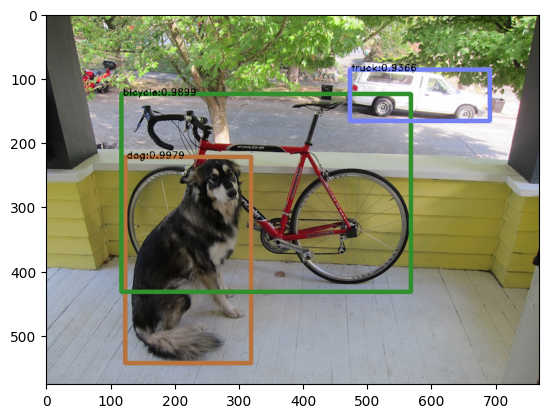

In [ ]:
if len(results)>0: # 결과물이 1개 이상인 경우에 대해서만, 그리자..
    for i in results:
        # 1. box를 그릴 준비!!!!
        x, y = boxes[i][0], boxes[i][1]
        width, height = boxes[i][2], boxes[i][3]
        # ==> 기존 좌표 정보!!!!!!

        # 2. 박스색
        colorarea_current = [int(j) for j in colorarea[classes[i]]]
        # ===> 선정된 class에 해당하는 색상 정보..
        # ++++ 사용하는 방식에 따라서,,,다양함!!!!
        # --> class이름별로 판단해서 색상을 직접 지정할 수 있음...

        # 3. opencv에서 box를 그려주세요!!!
        # 원본, 사각혀의 시작점, 끝점, 색상정보(c1,c2,c3), 두께.
        cv2.rectangle( image, (x,y), ( x+width, y+height), colorarea_current, 5)
        # --> 필요에 따라서 선택!!!!
        #     단, 주의사항은 해당하는 메서드가 요구하는 좌표 기준!!!!!!!!

        # 4. 라벨을 텍스트 : 가장 확률이 컸던 대상에 대한 이름,,,+ 확률...
        text_bar_current = "{}:{:.4f}".format( names[classes[i]], cofidence[i])
        # --> 이미지에 추가...
        cv2.putText(image, text_bar_current,
                    (x+2,y+2), cv2.FONT_HERSHEY_DUPLEX,
                    0.5, (0,0,0))
plt.imshow( cv2.cvtColor( image, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
# ===> 기존에 적당히 잘 학습된 모델을 가지고 와서
#      그냥 내 데이터에 적용만 해 본 것!!!!!!!!
#      +++ opencv를 연계를 해서 yolo를 사용하는 방법!!!!!!!!
#      +++ 박스를 그리거나, 대상을 표현할 때 시각화!!!!!!!!!

In [ ]:
# ===> 내가 이 모델을 기준으로 원하는 데이터로 재학습!!!
#      : 나의 목적에 맞는 yolo_customiuze!!!!
# ---> 1. 정답지를 다시 구성을 해야 함!!!!!
#      2. 그 정답지와 데이터를 기반으로 재학습을 + yolo vX
#      3. kaggle + 기타 업무!!!!!! 여러 후보 중 하나로 검토!!!!!!

# =====> 그래서 실제 kaggle같은 대회에 이 yolo로 튜닝을 해보자!!!!!!!!!!